In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file
df = pd.read_csv('UberDataset.csv')
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
# TO check the data-type and null value present or not in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Expectation Summery

1.In the DataSet Purpose column have many missing value first handle it's.

2. Then Start date and end date column has object type transfer into it's datetime.

3.Create a new column of different category of day shift like morning,afternoon,evening,and night.

4.Start and End column are not required so drop the column.

5. create 2 column where 1 store the start date and another store start time

In [5]:
# Fill the missing value with Not in Purpose column
df['PURPOSE'].fillna('NOT',inplace = True)
df

C:\Users\adakb\AppData\Local\Temp\ipykernel_5628\2605776603.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('NOT',inplace = True)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [6]:
# Now check the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
# now change the datatype of Startdate and enddate column object to Datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors = 'coerce')

In [8]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [9]:
# drop the start and end column
df.drop(columns = ['START','STOP'],inplace = True)
df.head()

,START_DATE,END_DATE,CATEGORY,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,63.7,Customer Visit


In [10]:
df['Start-date'] = df['START_DATE'].dt.date
df['Start-time'] = df['START_DATE'].dt.time

In [11]:
df.head()

,START_DATE,END_DATE,CATEGORY,MILES,PURPOSE,Start-date,Start-time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,5.1,Meal/Entertain,2016-01-01,21:11:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,5.0,NOT,2016-01-02,01:25:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,4.8,Errand/Supplies,2016-01-02,20:25:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,4.7,Meeting,2016-01-05,17:31:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,63.7,Customer Visit,2016-01-06,14:42:00


In [12]:
df['time'] = df['START_DATE'].dt.hour

In [13]:
df.head()

,START_DATE,END_DATE,CATEGORY,MILES,PURPOSE,Start-date,Start-time,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,5.1,Meal/Entertain,2016-01-01,21:11:00,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,5.0,NOT,2016-01-02,01:25:00,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,4.8,Errand/Supplies,2016-01-02,20:25:00,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,4.7,Meeting,2016-01-05,17:31:00,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,63.7,Customer Visit,2016-01-06,14:42:00,14.0


In [14]:
# create a new column with different categorry of day shift
def catigorize_col(df,col,label):
    edges = [0,11,15,17,20,24]
    df['Day-night'] = pd.cut(x = df[col],bins = edges,labels = label)
    return df

label = ['Morning','Non','Afternon','Evvening','Night']
catigorize_col(df,'time',label)

,START_DATE,END_DATE,CATEGORY,MILES,PURPOSE,Start-date,Start-time,time,Day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,5.1,Meal/Entertain,2016-01-01,21:11:00,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,5.0,NOT,2016-01-02,01:25:00,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,4.8,Errand/Supplies,2016-01-02,20:25:00,20.0,Evvening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,4.7,Meeting,2016-01-05,17:31:00,17.0,Afternon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,63.7,Customer Visit,2016-01-06,14:42:00,14.0,Non
...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,3.9,Temporary Site,NaT,NaT,NaN,NaN
1152,NaT,NaT,Business,16.2,Meeting,NaT,NaT,NaN,NaN
1153,NaT,NaT,Business,6.4,Temporary Site,NaT,NaT,NaN,NaN
1154,NaT,NaT,Business,48.2,Temporary Site,NaT,NaT,NaN,NaN


In [15]:
# Start date and end date have many missing value to drop the missing value
df.dropna(axis = 0,inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   MILES       413 non-null    float64       
 4   PURPOSE     413 non-null    object        
 5   Start-date  413 non-null    object        
 6   Start-time  413 non-null    object        
 7   time        413 non-null    float64       
 8   Day-night   413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(4)
memory usage: 29.6+ KB


# Q1)In which categorey do people book the most uber rides?

In [18]:
df['CATEGORY'].value_counts()

CATEGORY
Business    400
Personal     13
Name: count, dtype: int64

we see that Business categorey people book the most uber rides. show into a Data Visulization

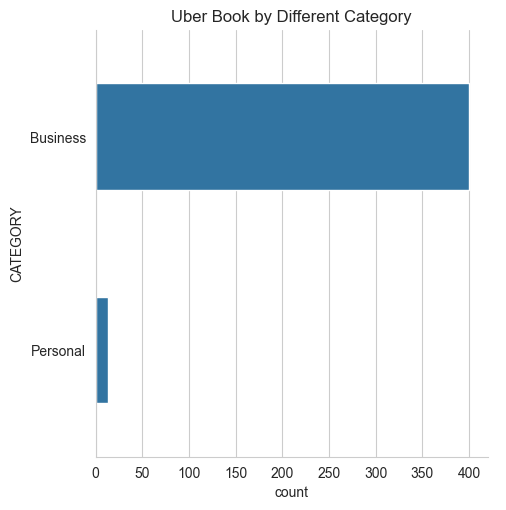

In [20]:
sns.set_style('whitegrid')
sns.catplot(y = 'CATEGORY',data = df,kind = 'count',order = df['CATEGORY'].value_counts().index,width = 0.5)
plt.title('Uber Book by Different Category')
plt.show()

# Q2) For which purpose do people book uber rides the most?

In [22]:
df['PURPOSE'].value_counts()

PURPOSE
NOT                159
Meeting             78
Meal/Entertain      62
Customer Visit      46
Errand/Supplies     45
Temporary Site      14
Between Offices      9
Name: count, dtype: int64

In purpose column have many missing value then fill with Not so here not is not consider. So, Meeting Purpose people book uber rides.Show it's Visulize

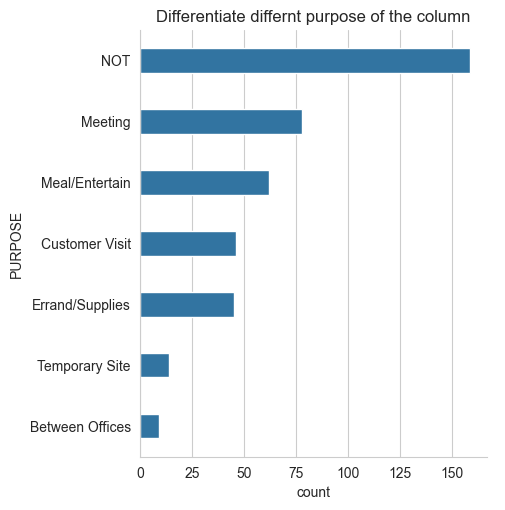

In [24]:
sns.set_style('whitegrid')
sns.catplot(y = 'PURPOSE',data = df,kind = 'count',order = df['PURPOSE'].value_counts().index,width = 0.4)
plt.title('Differentiate differnt purpose of the column')
plt.show()

# Q3) At what time do people bookcabs the most from uber?

In [26]:
df['Day-night'].value_counts()

Day-night
Non         125
Evvening     94
Morning      80
Afternon     69
Night        45
Name: count, dtype: int64

we see that non time people book cabs most of the time.

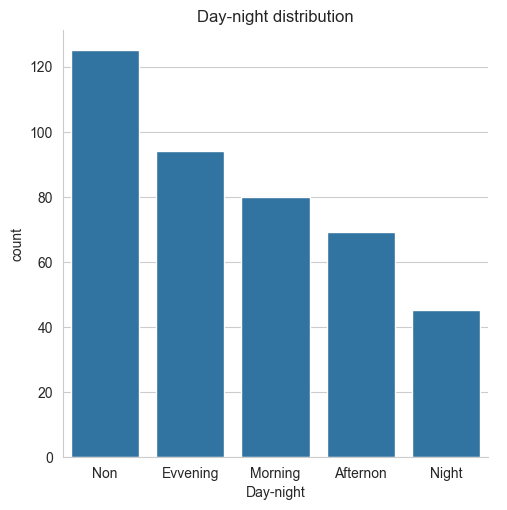

In [28]:
sns.catplot(x = 'Day-night',data = df,kind = 'count',order = df['Day-night'].value_counts().index)
plt.title('Day-night distribution')
plt.show()

# Q4)In which month do people book uber rides the most?

In [30]:
# Create new MONTH column on the dataset
df['MONTH'] = df['START_DATE'].dt.month

month_label = {1.0 : 'Jan',2.0 : 'Feb',3.0 : 'March',4.0 : 'April',5.0 : 'May',6.0 : 'June',7.0 : 'July',8.0 : 'Aug',9.0 : 'Sep',
              10.0 : 'Oct',11.0 : 'Nob',12.0 : 'Dec'}

df['MONTH'] = df.MONTH.map(month_label)

mon = df['MONTH'].value_counts(sort = False)

df.head()

,START_DATE,END_DATE,CATEGORY,MILES,PURPOSE,Start-date,Start-time,time,Day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,5.1,Meal/Entertain,2016-01-01,21:11:00,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,5.0,NOT,2016-01-02,01:25:00,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,4.8,Errand/Supplies,2016-01-02,20:25:00,20.0,Evvening,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,4.7,Meeting,2016-01-05,17:31:00,17.0,Afternon,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,63.7,Customer Visit,2016-01-06,14:42:00,14.0,Non,Jan


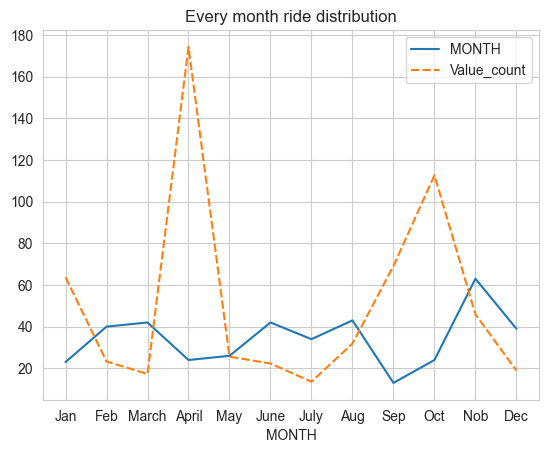

In [31]:
data = pd.DataFrame({
    'MONTH' : mon.values,
    'Value_count' : df.groupby('MONTH',sort = False)['MILES'].max()
})

sns.lineplot(data = data)
plt.title('Every month ride distribution')
plt.show()

We see that March-May month most uber ride books

# Q5) On which days of the week do people book uber rides the most?

In [64]:
# Create a new column of day
df['DAY'] = df['START_DATE'].dt.weekday

day_label = {0 :'Mon',1 : 'Tue',2 : 'Wed',3 : 'Thu',4 : 'Fri',5 : 'Sat',6 : 'Sat'}

df['DAY'] = df['DAY'].map(day_label)

df.head()

,START_DATE,END_DATE,CATEGORY,MILES,PURPOSE,Start-date,Start-time,time,Day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,5.1,Meal/Entertain,2016-01-01,21:11:00,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,5.0,NOT,2016-01-02,01:25:00,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,4.8,Errand/Supplies,2016-01-02,20:25:00,20.0,Evvening,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,4.7,Meeting,2016-01-05,17:31:00,17.0,Afternon,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,63.7,Customer Visit,2016-01-06,14:42:00,14.0,Non,Jan,Wed


<Axes: xlabel='DAY', ylabel='count'>

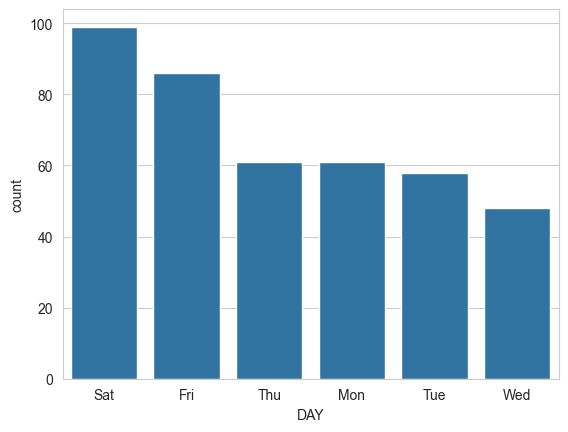

In [72]:
data_label = df['DAY'].value_counts()

sns.barplot(x = data_label.index,y = data_label)

So we see that Saturday people book uber ride most

# Q6) How many miles do people usually book a cab for through Uber?

In [82]:
# Find the Average miles where the people book uber ride
Avg_mile = df['MILES'].mean()

print(f"So, Average {int(Avg_mile)} miles people book the uber ride")

So, Average 9 miles people book the uber ride
